## Image Processing with OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read the image
img_path = './data/bird.jpg'
image = cv2.imread(img_path)
#image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# # Display the image
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
image.shape

(964, 1127, 3)

In [7]:
# # Read the image
# img_path = '/home/fm-pc-lt-281/Fellowship-2024/cv applications with with opencv/data/bird.jpg'
# image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# # # Display the image
# cv2.imshow('Image', image)
# height, width = image.shape[:2]
# # resize window to fit image
# cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
# cv2.resizeWindow("Image", width, height) 
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Changing colorspace

In [8]:
# Convert the image to grayscale
# opencv reads image in bgr color-space by default
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
cv2.imshow('Grayscale Image', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Original')

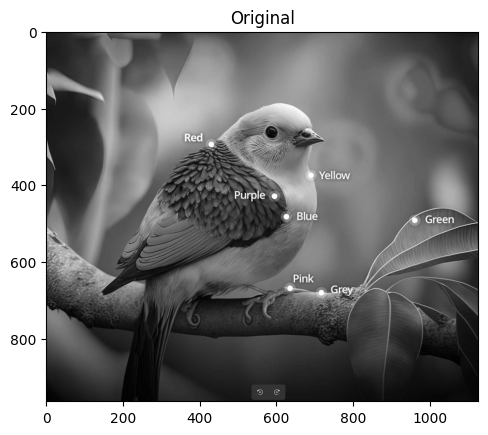

In [9]:
plt.imshow(gray_image, cmap='gray')
plt.title("Original")

In [10]:
# Convert the image to rgb
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the grayscale image
cv2.imshow('RGB Image', rgb_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Original')

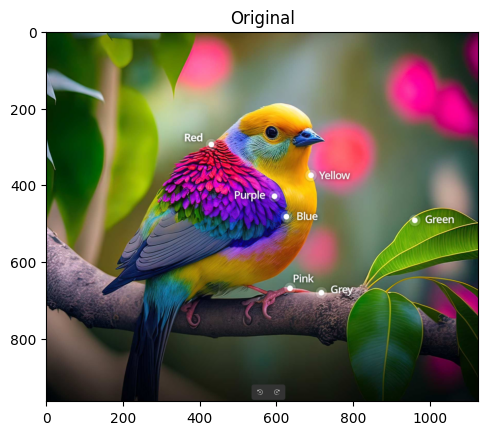

In [11]:
import matplotlib.pyplot as plt

plt.subplot(111)
plt.imshow(rgb_image)
plt.title("Original")

In [13]:
# Convert the image to grayscale
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Display the grayscale image
cv2.imshow('HSV Image', hsv_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Original')

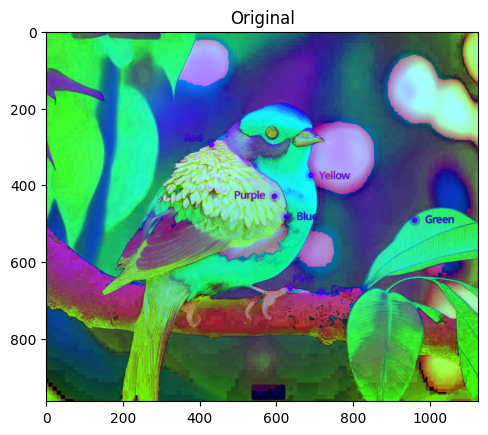

In [14]:
import matplotlib.pyplot as plt

plt.subplot(111)
plt.imshow(hsv_image)
plt.title("Original")

### Geometric transformation of images

In [ ]:
# scaling
img_path = 'data/bird.jpg'
image = cv2.imread(img_path)

# interpolation: cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_AREA
res = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_NEAREST)
 
cv2.imshow('Image', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
res.shape

(482, 564, 3)

In [ ]:
# # Translation: Define the translation matrix
# tx, ty = 200, 200  # Shift 100 pixels to the right and 50 pixels down
# translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

# # Apply the translation
# translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]),
#                                    borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))

# # Convert to RGB for displaying with Matplotlib
# translated_image_rgb = cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB)

# # Display the result
# plt.imshow(translated_image_rgb)
# plt.axis('off')
# plt.show()

In [ ]:
image.shape[:2]

(964, 1127)

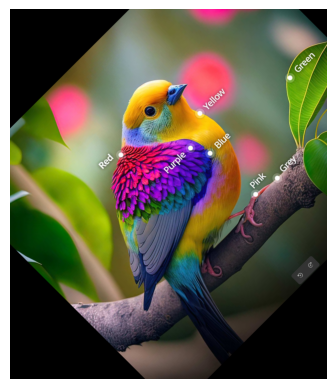

In [ ]:
# rotation
# Get the image dimensions (height, width)
(h, w) = image.shape[:2]

# Calculate the center of the image
center = (w // 2, h // 2)

# Define the rotation matrix
angle = 45  # Rotate 45 degrees
scale = 1.0  # No scaling
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# Apply the rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (h,w))

# Convert to RGB for displaying with Matplotlib
rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

# Display the result
plt.imshow(rotated_image_rgb)
plt.axis('off')
plt.show()

In [21]:
# # Affine transsformation
# # Define the points for affine transformation
# srcPoints = np.float32([[50, 50], [200, 50], [50, 200]])
# dstPoints = np.float32([[10, 100], [200, 50], [100, 250]])

# # Get the affine transformation matrix
# affine_matrix = cv2.getAffineTransform(srcPoints, dstPoints)

# # Apply the affine transformation
# affine_transformed_image = cv2.warpAffine(image, affine_matrix, (image.shape[1], image.shape[0]))

# # Convert to RGB for displaying with Matplotlib
# affine_transformed_image_rgb = cv2.cvtColor(affine_transformed_image, cv2.COLOR_BGR2RGB)

# # Display the result
# plt.imshow(affine_transformed_image_rgb)
# plt.axis('off')
# plt.show()

### Morphological Transformation of Images
* Morphological transformations in image processing are operations that alter the shape and structure of objects in an image. 
* It is normally performed on binary images but we can also use them on a grayscale image.  
* Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also come into play.


#### Erosion
* it erodes away the boundaries of foreground object (Always try to keep foreground in white).
* The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).
* All the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image.
* It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

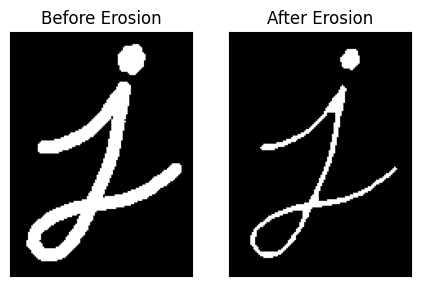

In [4]:
# Erosion
img_path = 'data/j.png'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Define a kernel (structuring element)
kernel = np.ones((5,5), np.uint8)

# Apply erosion
erosion = cv2.erode(image, kernel, iterations=1)

plt.figure(figsize=(8,7)) 
plt.subplot(131),plt.imshow(image, cmap='gray'),plt.title('Before Erosion')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(erosion, cmap='gray'),plt.title('After Erosion')
plt.xticks([]), plt.yticks([])
# plt.subplot(133),plt.imshow(dilation, cmap='gray'),plt.title('Dilation')
# plt.xticks([]), plt.yticks([])
plt.show()


#### Dilation
* t is just opposite of erosion.
* Here, a pixel element is '1' if at least one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases.
* Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases.
* It is also useful in joining broken parts of an object.

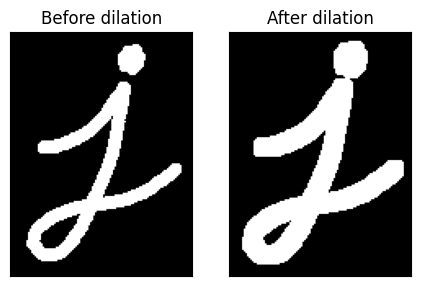

In [7]:
img_path = 'data/j.png'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Define a kernel (structuring element)
kernel = np.ones((5,5), np.uint8)
# kernel = np.ones((2,2), np.uint8)
# Apply dilation
dilation = cv2.dilate(image, kernel, iterations=1)

plt.figure(figsize=(8,7)) 
plt.subplot(131),plt.imshow(image, cmap='gray'),plt.title('Before dilation')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dilation, cmap='gray'),plt.title('After dilation')
plt.xticks([]), plt.yticks([])
# plt.subplot(133),plt.imshow(dilation, cmap='gray'),plt.title('Dilation')
# plt.xticks([]), plt.yticks([])
plt.show()


#### Opening
* Opening is just another name of erosion followed by dilation.
* It is useful in removing noise.

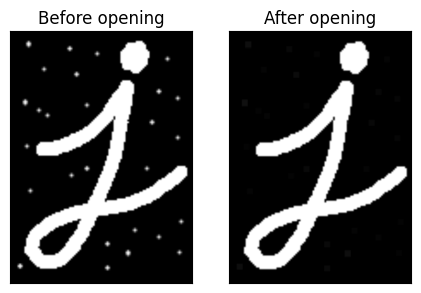

In [8]:
# opening
img_path = 'data/opening.png'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Define a kernel (structuring element)
kernel = np.ones((10,10), np.uint8)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(8,7)) 
plt.subplot(131),plt.imshow(image, cmap='gray'),plt.title('Before opening')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(opening, cmap='gray'),plt.title('After opening')
plt.xticks([]), plt.yticks([])
plt.show()


#### Closing
* Closing is reverse of Opening, Dilation followed by Erosion.
* It is useful in closing small holes inside the foreground objects, or small black points on the object.

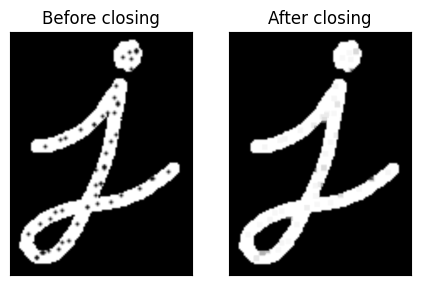

In [9]:
# closing
img_path = 'data/closing.png'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Define a kernel (structuring element)
kernel = np.ones((10,10), np.uint8)
opening = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(8,7)) 
plt.subplot(131),plt.imshow(image, cmap='gray'),plt.title('Before closing')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(opening, cmap='gray'),plt.title('After closing')
plt.xticks([]), plt.yticks([])
plt.show()



### Image Thresholding 

Used for segmenting images into meaningful regions or objects by separating pixels into two or more groups based on their intensity values. It helps to extract important information from images, such as distinguishing foreground from background, detecting edges, segmenting objects, and simplifying image data for further analysis or processing.

#### Simple Global Thresholding

- Use when the image has consistent lighting conditions.
- Suitable for images with well-defined foreground and background.
- Examples: Binarizing text documents, segmenting objects against uniform backgrounds.

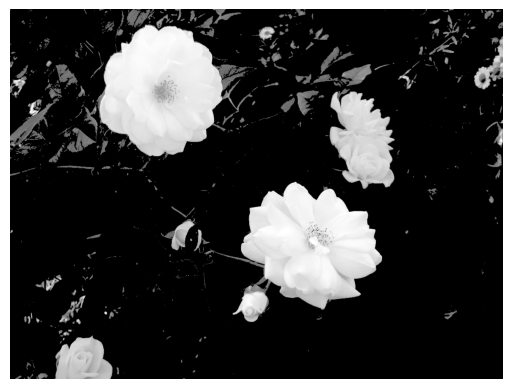

In [10]:
img_path = 'data/flower.png'
gray_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply simple thresholding ; THRESH_BINARY_INV, THRESH_BINARY, THRESH_TRUNC, THRESH_TOZERO, THRESH_TOZERO_INV
threshold_value = 100
max_value = 255
_, thresholded_image = cv2.threshold(gray_image, threshold_value, max_value, cv2.THRESH_TOZERO)

# Display the result
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')
plt.show()

#### Adaptive Thresholding

- Use when the image has consistent lighting conditions.
- Suitable for images with well-defined foreground and background.
- Examples: Binarizing text documents, segmenting objects against uniform backgrounds.

* Use adaptive mean thresholding when the image has relatively uniform illumination variations or when there is mild noise present.
* Use adaptive Gaussian thresholding when the image has non-uniform illumination or when there are sharp gradients in illumination

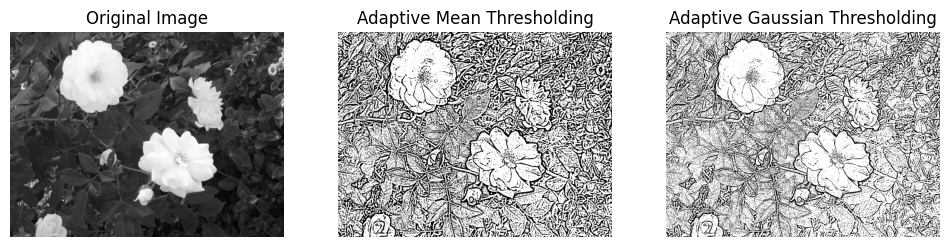

In [11]:
max_value = 255
blockSize = 11
C = 2
# Apply adaptive mean thresholding 
adaptive_mean = cv2.adaptiveThreshold(gray_image, max_value, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize, C)

# Apply adaptive Gaussian thresholding
adaptive_gaussian = cv2.adaptiveThreshold(gray_image, max_value, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize, C)

# Display the results
plt.figure(figsize=(12, 7))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(adaptive_mean, cmap='gray')
plt.title('Adaptive Mean Thresholding')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')
plt.axis('off')

plt.show()

#### OTSU's Threshoding

- Effective for images with bimodal or near-bimodal intensity distributions.
- Examples: Segmenting objects with distinct intensity peaks, separating foreground from background in well-illuminated images.

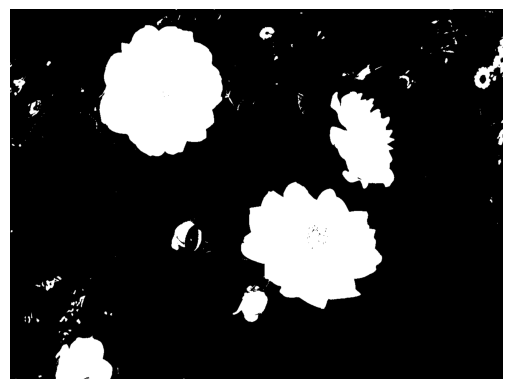

In [12]:
# Apply Otsu's thresholding
_, otsu_threshold = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the result
plt.imshow(otsu_threshold, cmap='gray')
plt.axis('off')
plt.show()

### Smoothing images
Learn to blur the images

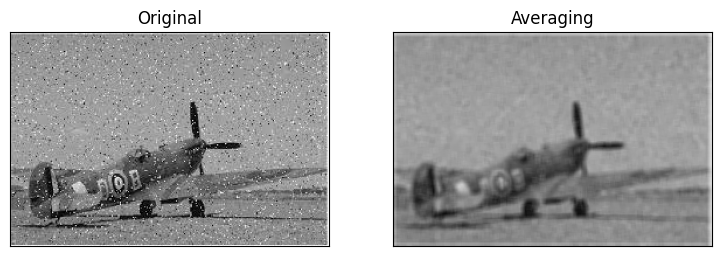

In [14]:
# filtering
img_path = 'data/airplane.jpg'
# assert image is not None, "file could not be read, check with os.path.exists()"

image = cv2.imread(img_path)
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(image,-1,kernel)

# # Convert to RGB for displaying with Matplotlib
# dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14,7)) 
plt.subplot(131),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

#### Gaussian Blur

- Use Gaussian blur when you want a smooth, continuous blur effect.
- It's effective for reducing Gaussian noise and smoothing images with gradual transitions.

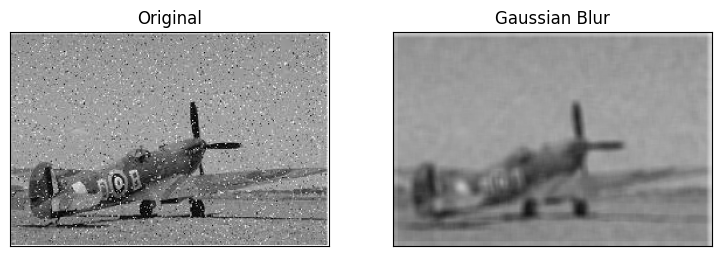

In [15]:
# gaussian blur produces a more natural blurring effect
# Apply Gaussian blurring
gaussian_blur = cv2.GaussianBlur(image, (7,7), 10)

# Convert to RGB for displaying with Matplotlib
gaussian_blur_rgb = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14,7)) 
plt.subplot(131),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gaussian_blur_rgb),plt.title('Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.show()

#### Median Blur
- It's effective for removing salt-and-pepper noise and preserving sharp edges.

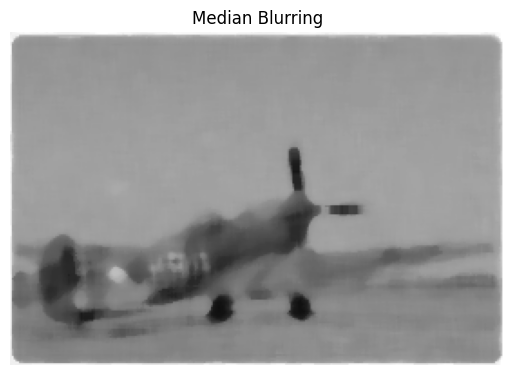

In [16]:
# Gaussian blur effective for removing salt-and-pepper noise while preserving edges
# Apply median blurring
median_blur = cv2.medianBlur(image, 9)

# Convert to RGB for displaying with Matplotlib
median_blur_rgb = cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB)

# Display the result
plt.imshow(median_blur_rgb)
plt.title('Median Blurring')
plt.axis('off')
plt.show()

#### Bilateral Filtering

- Used for Image denoising
- Edge-preserving smoothing.
- It achieves this by considering both spatial and intensity differences when filtering pixels.

In [17]:
# # Apply bilateral filtering
# d = 9  # Diameter of the pixel neighborhood
# sigmaColor = 255  # Standard deviation of color space
# sigmaSpace = 75  # Standard deviation of coordinate space

# bilateral_blur = cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)

# # Display the result
# plt.imshow(bilateral_blur)
# plt.title('Bilateral Filtering')
# plt.axis('off')
# plt.show()

### Image Gradient

Learn to find image gradients, edges etc. 
Image gradient represents the rate of change in pixel intensity values across an image. 

#### Laplacian

Used for general edge detection tasks where the orientation of edges is not critical.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-206.0..207.0].


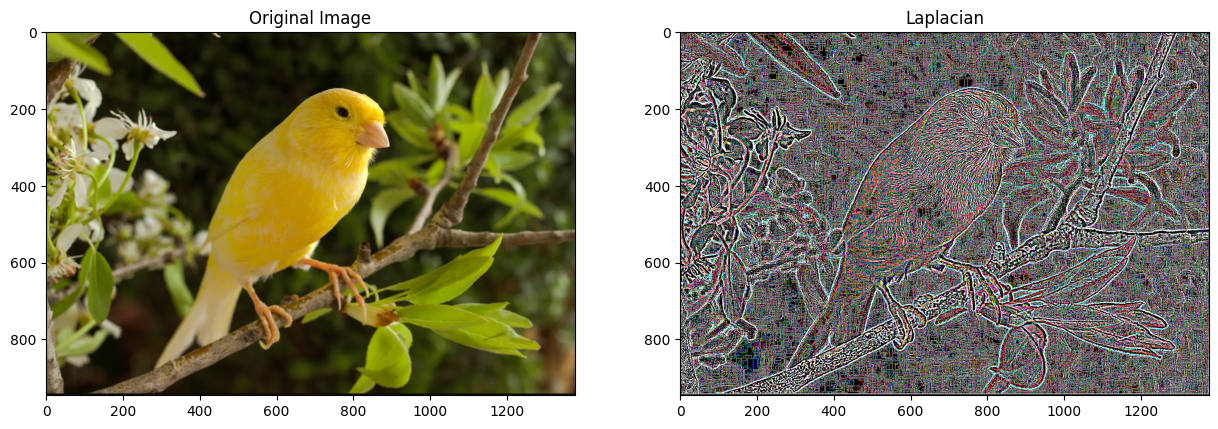

In [18]:
# Read and convert image to grayscale
img_path = 'data/bird3.png'
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Laplacian
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Display the results
plt.figure(figsize=(15, 15))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(laplacian, cmap='hsv'), plt.title('Laplacian')
plt.show()

#### Sobel
- Used for directional edge detection tasks where edge orientation matters.
- Effective for detecting edges along specific directions, such as horizontal or vertical.

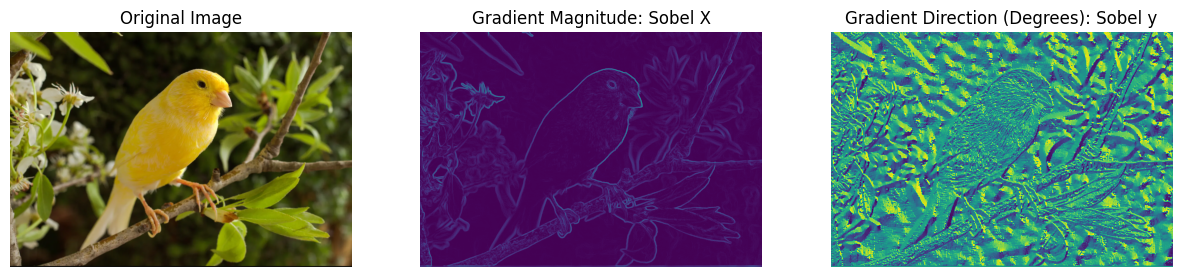

In [19]:
# Read and convert image to grayscale
img_path = 'data/bird3.png'
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute gradient using Sobel operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Compute gradient along x-axis
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Compute gradient along y-axis

# Compute magnitude and direction of gradient
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_direction = np.arctan2(sobel_y, sobel_x)

# Scale gradient magnitude to range [0, 255]
gradient_magnitude_scaled = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Convert gradient direction from radians to degrees
gradient_direction_degrees = np.degrees(gradient_direction)

# Display the results
plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(gradient_magnitude_scaled), plt.title('Gradient Magnitude: Sobel X'), plt.axis('off')
plt.subplot(133), plt.imshow(gradient_direction_degrees), plt.title('Gradient Direction (Degrees): Sobel y'), plt.axis('off')
plt.show();

### Canny Edge Detection

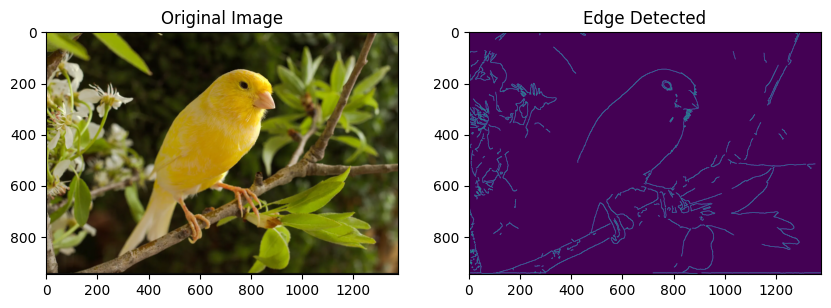

In [20]:
# Apply Canny edge detection
img_path = 'data/bird3.png'
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lower_threshold = 100
upper_threshold = 200

edges = cv2.Canny(gray_image, lower_threshold, upper_threshold)

# Display the edges
plt.figure(figsize=(10,7))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(edges), plt.title('Edge Detected')
plt.show()